In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import glob
import imgkit
import dataframe_image as dfi
import math
import matplotlib.patches as mpatches

In [2]:
ptm_df = pd.read_csv('Data/Conserved_ptms_best_loc.csv')
mod_residues_dic = []
for i in ptm_df.mod_residues_dic:
    d = ast.literal_eval(i)
    mod_residues_dic.append(d)
ptm_df.mod_residues_dic = mod_residues_dic
num_species = []
for index, row in ptm_df.iterrows():
    d = row['mod_residues_dic']
    species = 0
    for key in d:
        if len(d[key][0]) > species:
            species = len(d[key][0])
    num_species.append(species)
ptm_df['num_species'] = num_species
ptm_df = ptm_df.sort_values('num_species', ascending = False)
ptm_df = ptm_df[ptm_df.num_species >=5]
residues = ['Ammonium', 'Methyl:2H(3)13C(1)', 'Delta:H(4)C(2)O(-1)S(1)', 'Fluoro', 'Cation:Mg[II]', 'Acetyl:13C(2)', 'Label:2H(3)+Oxidation', 'Cation:Na', 'Cation:Fe[III]', 'Cation:Ca[II]', 'Label:13C(4)', 'Methyl:2H(3)']
ptm_df = ptm_df[~ptm_df.Modification.isin(residues)]
ptm_df

,Unnamed: 0,Gene,Modification,mod_residues_dic,num_species
221,221,prfB,Methyl,"{273: [{'Rhodopseudomonas_palustris', 'Cupriav...",13
343,343,rplL,Carbamyl,"{8: [{'Mycobacterium_smegmatis', 'Cellvibrio_g...",10
218,218,prfA,Methyl,"{244: [{'Citrobacter_freundii', 'Rhizobium_rad...",9
696,696,tuf,Carbamyl,"{21: [{'Delftia_acidovorans', 'Cellulophaga_ba...",8
503,503,rpsB,Ammonia-loss,"{42: [{'Mycobacterium_smegmatis', 'Rhodopseudo...",7
136,136,fusA,Dihydroxyimidazolidine,"{74: [{'Citrobacter_freundii', 'Cupriavidus_ne...",7
137,137,fusA,Ethoxyformyl,"{74: [{'Citrobacter_freundii', 'Cupriavidus_ne...",7
135,135,fusA,Carboxyethyl,"{74: [{'Citrobacter_freundii', 'Cupriavidus_ne...",7
92,92,dnaK,Ammonia-loss,"{61: [{'Sulfobacillus_thermosulfidooxidans', '...",7
32,32,atpA,Carbamyl,"{5: [{'Bacillus_subtilis', 'Paracoccus_denitri...",7


In [3]:
pd.unique(ptm_df[ptm_df.Gene == 'tuf'].Modification)

array(['Carbamyl', 'Ammonia-loss', 'Dehydrated', 'Carboxy', 'Methyl',
       'glyoxalAGE', 'Oxidation'], dtype=object)

In [4]:
def parse_meg(file):
    rows = []
    file = open(file)
    fasta_id = ''
    seq = str()
    i = 0
    d = dict()
    for line in file:
        
        if '#' in line and 'mega' not in line:
            if len(seq) > 0 and len(fasta_id) > 0:
                d['fasta_id'] = fasta_id
                d['sequence'] = seq
                rows.append(d)
                i += 1
            line = line.replace('\n', '').replace('#', '')
            fasta_id = line.strip()
            seq = ''
            d = dict()
        else:
            seq = seq + line.replace('\n', '') 
    d['fasta_id'] = fasta_id
    d['sequence'] = seq
    rows.append(d)
    
    return pd.DataFrame(rows)

In [5]:
files = glob.glob('Data/Alignments/*.meg')
meg_files = []
for file in files:
    meg = parse_meg(file)
    meg_files.append(meg)
meg_df = pd.concat(meg_files)

In [6]:
def styling_specific_cell(x,row_idx,col_idx, cellcolor, txtcolor = 'white'):
    df_styler = pd.DataFrame('', index=x.index, columns=x.columns)
    for row, col, ccolor in zip(row_idx, col_idx, cellcolor):
        color = 'background-color: {}; color: {}'.format(ccolor,txtcolor)
        df_styler.loc[row, col] = color
    return df_styler

In [7]:
tuf_color_map = dict()
def color_alignment(gene_name, vert = False):
   # tuf_color_map = dict()
    gene_meg = meg_df[meg_df.fasta_id.str.contains(gene_name)]
    gene_ptm = ptm_df[ptm_df.Gene == gene_name]
    rows = []
    for index, row in gene_meg.iterrows():
        new_row = dict()
        seq = row.sequence
        fasta_id = row.fasta_id
        new_row['Organism(gene)'] = fasta_id
        for i,c in zip(range(len(seq)),seq):
            new_row[i] = c
        rows.append(new_row)
    split_gene_meg = pd.DataFrame(rows)
    colors = ['blue', 'green', 'cyan', 'orange', 'magenta', 'purple', 'red', 'pink', 'brown', 'lime', 'teal', 'navy', '#B31B1B', '#703642', '#FFB200', '#FFBCD9', '#013220']
    if not vert:
        split_gene_meg.index = split_gene_meg['Organism(gene)']
        split_gene_meg=split_gene_meg.drop(columns = ['Organism(gene)'])
        rows = []
        cols = []
        colors_used = []
        i = 0
        for index, row in gene_ptm.iterrows():
            ptm_map = row.mod_residues_dic
            for key, value in ptm_map.items():
                fasta_ids = value[1]
                for fasta_id in fasta_ids:
                    rows.append(fasta_id)
                    cols.append(key)
                    colors_used.append(colors[i])
            if gene_name == 'tuf':
                tuf_color_map[row.Modification] = colors[i]
            i += 1
        split_gene_meg.columns.name = 'Residue Position'
        #tuf_color_map_global = tuf_color_map
    else:
        organisms = list(split_gene_meg['Organism(gene)'])
        del split_gene_meg['Organism(gene)']
        split_gene_meg = split_gene_meg.transpose()
        split_gene_meg.columns = organisms
        split_gene_meg = split_gene_meg[organisms]
        #split_gene_meg.index.name = 'Residue Position'
        split_gene_meg.columns.name = 'Organism(gene)'
        rows = []
        cols = []
        colors_used = []
        i = 0
        for index, row in gene_ptm.iterrows():
            ptm_map = row.mod_residues_dic
            for key, value in ptm_map.items():
                fasta_ids = value[1]
                for fasta_id in fasta_ids:
                    rows.append(key)
                    cols.append(fasta_id)
                    colors_used.append(colors[i])
            i += 1
        fasta_id_map = dict()
        new_cols = []
        for i, fasta_id in zip(range(0, len(split_gene_meg.columns)), split_gene_meg.columns):
            fasta_id_map[fasta_id] = i
            new_cols.append(i)
        split_gene_meg.columns = new_cols
        new_cols = []
        for fasta_id in cols:
            new_cols.append(fasta_id_map[fasta_id])
        cols = new_cols
    
    return(split_gene_meg.style.apply(styling_specific_cell, row_idx = rows, col_idx = cols, cellcolor = colors_used, axis= None))

In [8]:
prfB = color_alignment('prfB')

In [9]:
drop_cols = list(range(0,270))
drop_cols.extend(list(range(281, 411)))

In [10]:
prfB_chunk = prfB.hide_columns(drop_cols)
prfB_chunk

Residue Position,270,271,272,273,274,275,276,277,278,279,280
Organism(gene),,,,,,,,,,,
Acidiphilium_cryptum(prfB),A,S,G,A,G,G,Q,H,V,N,K
Bacillus_cereus(prfB),A,S,G,A,G,G,Q,H,V,N,T
Bacillus_subtilis(prfB),A,S,G,A,G,G,Q,H,V,N,T
Bacteroides_fragilis(prfB),S,G,G,A,G,G,Q,N,V,N,K
Cellulophaga_baltica(prfB),S,S,G,A,G,G,Q,N,V,N,K
Cellvibrio_gilvus(prfB),S,S,G,P,G,G,Q,S,V,N,T
Chryseobacterium_indologenes(prfB),S,S,G,A,G,G,Q,N,V,N,K
Citrobacter_freundii(prfB),A,S,G,A,G,G,Q,H,V,N,R
Coprococcus_comes(prfB),S,S,G,A,G,G,Q,H,I,N,K


In [11]:
dfi.export(prfB_chunk, 'Figures/Figure_4.png', max_cols= -1)

In [12]:
tuf = color_alignment('tuf', False)
dfi.export(tuf, 'Figures/Supplemental_Figure_1_tuf_alignment.png', max_cols=-1)
tuf

In [13]:
hide = list(range(0,60))
hide.extend(list(range(81,423)))
tuf = tuf.hide_columns(hide)
dfi.export(tuf, 'Figures/Figure_5b.png', max_cols=-1)
tuf

Residue Position,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80
Organism(gene),,,,,,,,,,,,,,,,,,,,,
Acidiphilium_cryptum(tuf),A,Y,D,S,I,D,A,A,P,E,E,R,A,R,G,I,T,I,A,T,A
Bacillus_cereus(tuf),G,Y,D,Q,I,D,A,A,P,E,E,R,E,R,G,I,T,I,S,T,A
Bacillus_subtilis(tuf),A,Y,D,Q,I,D,G,A,P,E,E,R,E,R,G,I,T,I,S,T,A
Bacteroides_fragilis(tuf),S,F,D,S,I,D,N,A,P,E,E,K,E,R,G,I,T,I,N,T,S
Bacteroides_thetaiotaomicron(tuf),S,F,D,S,I,D,N,A,P,E,E,K,E,R,G,I,T,I,N,T,S
Cellulophaga_baltica(tuf),S,F,D,S,I,D,N,A,P,E,E,K,E,R,G,I,T,I,N,T,S
Cellvibrio_gilvus(tuf),P,F,D,E,I,D,K,A,P,E,E,K,Q,R,G,I,T,I,N,I,A
Chryseobacterium_indologenes(tuf),D,F,S,A,I,D,S,A,P,E,E,K,E,R,G,I,T,I,N,T,A
Citrobacter_freundii(tuf),-,-,-,-,-,-,-,-,-,-,-,-,-,R,G,I,T,I,N,T,S


In [14]:
tuf_df = ptm_df[ptm_df.Gene == 'tuf']
tuf_df

,Unnamed: 0,Gene,Modification,mod_residues_dic,num_species
696,696,tuf,Carbamyl,"{21: [{'Delftia_acidovorans', 'Cellulophaga_ba...",8
719,719,tuf,Ammonia-loss,"{51: [{'Cellulophaga_baltica', 'Cellvibrio_gil...",6
714,714,tuf,Dehydrated,"{76: [{'Ruminococcus_gnavus', 'Citrobacter_fre...",5
694,694,tuf,Carboxy,"{38: [{'Cellulophaga_baltica', 'Rhodopseudomon...",5
713,713,tuf,Methyl,"{68: [{'Bacillus_subtilis', 'Cellulophaga_balt...",5
701,701,tuf,glyoxalAGE,"{60: [{'Coprococcus_comes', 'Ruminococcus_gnav...",5
691,691,tuf,Oxidation,"{35: [{'Sulfobacillus_thermosulfidooxidans', '...",5


In [15]:
tuf_mods = dict()
for index, row in tuf_df.iterrows():
    d = row.mod_residues_dic
    mod = row.Modification
    for key in d:
        species = d[key][0]
        if key not in tuf_mods:
            mod_dic = dict()
            mod_dic[mod] = len(species)
            tuf_mods[key] = mod_dic
        else:
            mod_dic = tuf_mods[key]
            mod_dic[mod] = len(species)
            tuf_mods[key] = mod_dic   

In [16]:
tuf_mod_df = pd.DataFrame(tuf_mods)
tuf_mod_df = tuf_mod_df.transpose()
tuf_mod_df['Residue Position'] = tuf_mod_df.index
tuf_mod_df = tuf_mod_df.melt(id_vars = 'Residue Position', var_name = 'Modification', value_name = 'Number of Species')
tuf_mod_df = tuf_mod_df.dropna()
tuf_mod_df = tuf_mod_df.sort_values('Residue Position')
tuf_mod_df

,Residue Position,Modification,Number of Species
0,21,Carbamyl,2.0
1,33,Carbamyl,2.0
2,34,Carbamyl,2.0
3,35,Carbamyl,2.0
245,35,Oxidation,2.0
...,...,...,...
1673,353,Dehydrated,2.0
948,354,Ammonia-loss,6.0
1202,418,glyoxalAGE,3.0
1203,419,glyoxalAGE,4.0


In [17]:
rows = []
for i in range(1, 423):
    if i not in list(tuf_mod_df['Residue Position']):
        row = dict()
        row['Residue Position'] = i
        row['Number of Species'] = float('nan')
        rows.append(row)
tuf_mod_df_2 = pd.DataFrame(rows)
tuf_mod_df = pd.concat([tuf_mod_df, tuf_mod_df_2])
tuf_mod_df = tuf_mod_df.sort_values('Residue Position')
tuf_mod_df
               
       

,Residue Position,Modification,Number of Species
0,1,NaN,NaN
1,2,NaN,NaN
2,3,NaN,NaN
3,4,NaN,NaN
4,5,NaN,NaN
...,...,...,...
1202,418,glyoxalAGE,3.0
1203,419,glyoxalAGE,4.0
1204,420,glyoxalAGE,2.0
178,421,NaN,NaN


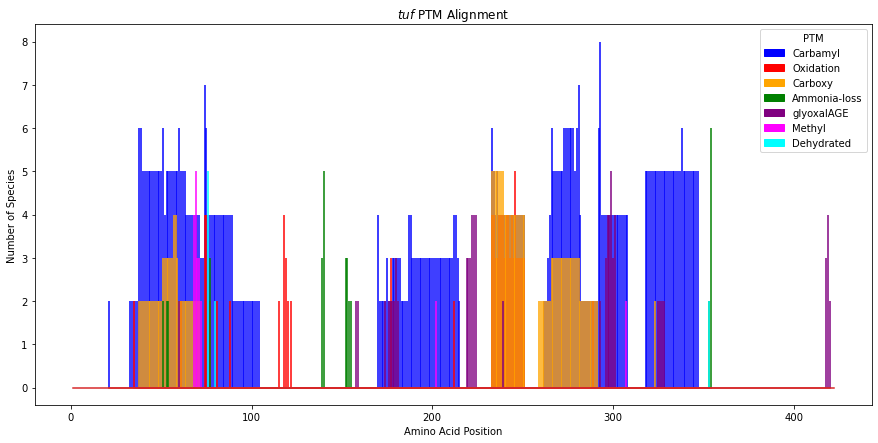

In [18]:
plt.figure(figsize=(15,7))
handles = []
for mod in pd.unique(tuf_mod_df.Modification):
    if type(mod) == float:
        mod_df = tuf_mod_df[tuf_mod_df.Modification.isna()]
        color = 'black'
    else:    
        mod_df = tuf_mod_df[tuf_mod_df.Modification == mod]
        color = tuf_color_map[mod]
    plt.stem(mod_df['Residue Position'],mod_df['Number of Species'],use_line_collection=True, linefmt = color, markerfmt = 'none')
    if type(mod) != float:
        patch = mpatches.Patch(color = color, label = mod)
        handles.append(patch)
plt.legend(handles=handles, title = 'PTM')
plt.xlabel('Amino Acid Position')
plt.ylabel('Number of Species')
plt.title(r'$tuf$ PTM Alignment')
plt.savefig('Figures/Figure_5a.png')